# Introduction

Sean had two library control files that contained runs like my ~/proj/C1_e10.5_mouse_limb_run3_Dec5_2016_2/
which should i use?

In [6]:
from woldrnaseq.models import load_library_tables, load_all_samstats

In [15]:
%matplotlib inline

In [2]:
mm10 = load_library_tables(['/woldlab/castor/home/sau/flowcells/C1_mouse_limb_combined_Mar_2017/library_mm10.tsv'])
mm10_clean = load_library_tables(['/woldlab/castor/home/sau/flowcells/C1_mouse_limb_combined_Mar_2017/library_mm10_clean.tsv'])

In [3]:
print(mm10.shape, mm10_clean.shape)

(392, 7) (620, 7)


In [20]:
mm10_ids = [ x.replace('_mm10', '') for x in mm10.index]
clean_ids = [ x.replace('_mm10', '').replace('_clean', '') for x in mm10_clean.index]

In [21]:
set(mm10_ids).difference(clean_ids)

set()

In [22]:
only_in_clean = list(set(clean_ids).difference(set(mm10_ids)))
only_in_clean[:5]

['17328_B9', '18042_A12', '17333_G4', '18043_B3', '18089_H5']

Looks like mm10_clean is the superset?

Is its read_length fixed?

In [9]:
samstats_mm10 = load_all_samstats(mm10)
samstats_clean = load_all_samstats(mm10_clean)

In [11]:
samstats_clean['Read Length, Minimum'].describe()

count    620.0
mean      50.0
std        0.0
min       50.0
25%       50.0
50%       50.0
75%       50.0
max       50.0
Name: Read Length, Minimum, dtype: float64

In [13]:
samstats_mm10['Read Length, Minimum'].describe()

count      8.000000
mean      96.262837
std      121.521282
min       19.174125
25%       50.000000
50%       50.000000
75%       69.196429
max      392.000000
Name: Read Length, Minimum, dtype: float64

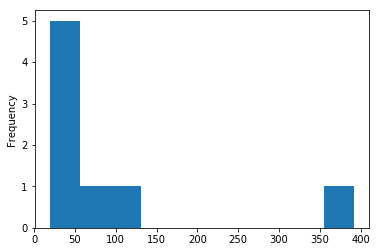

In [16]:
samstats_mm10['Read Length, Average'].plot.hist()

Well that was unexpected.... Why does library_mm10.tsv contain some > 350 bp reads? How does it contain them?

In [17]:
samstats_mm10[samstats_mm10['Read Length, Average'] > 150]

,Unique,Unique Splices,Multi,Multi Splices,Total Aligned Reads,Fraction Mapped,Complexity,"Read Length, Minimum","Read Length, Maximum","Read Length, Average"
count,392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0


Ok that looks more like there was a summary count at the end of a samstats file.

Found another source of duplicate library IDs. are they all conflicted

In [18]:
h5lv3 = load_library_tables(['/woldlab/castor/home/sau/flowcells/H5LV3BCXY/library.tsv'])

In [23]:
set(h5lv3.index).difference(clean_ids)

set()

Everything in H5LV3BCXY is in C1_mouse_limb_combined_Mar_2017/library_mm10_clean.tsv

In [24]:
run2 = load_library_tables(['/woldlab/castor/home/sau/flowcells/C1_e10.5_mouse_limb_run2_June20_2016/library.tsv'])

In [26]:
set(run2.index).difference(clean_ids)

set()

Everything in C1_e10.5_mouse_limb_run2_June20_2016/library.tsv is also in C1_mouse_limb_combined_Mar_2017/library_mm10_clean.tsv